In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
data.shape

(1470, 35)

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.describe().transpose()

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [8]:
data.describe(include='O').transpose()

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [9]:
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

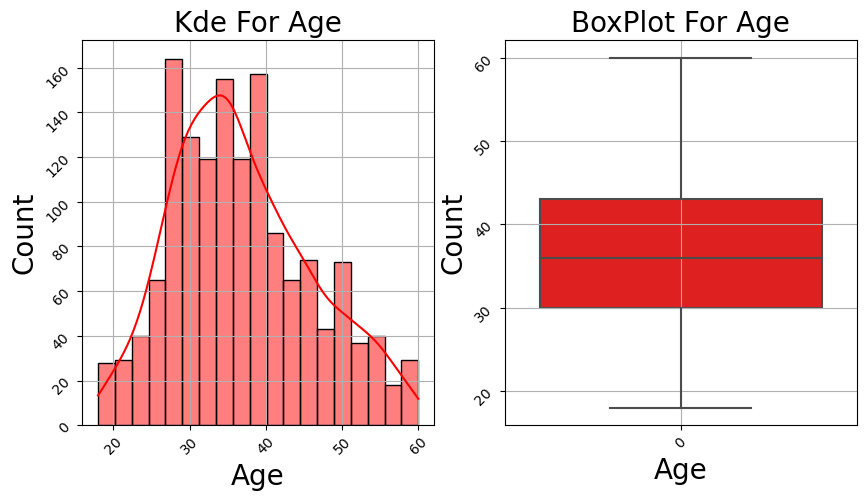

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data.Age,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data.Age,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [11]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

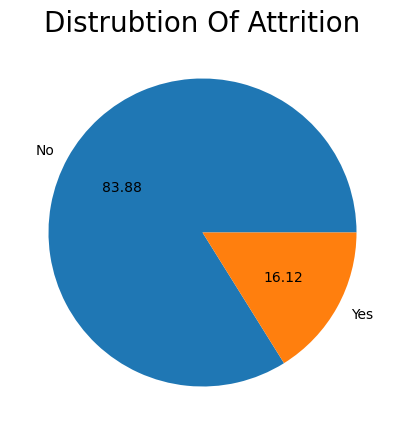

In [12]:
plt.figure(figsize=(10,5))
plt.pie(data.Attrition.value_counts().values,labels=data.Attrition.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Attrition',fontsize=20)
plt.show()

In [13]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

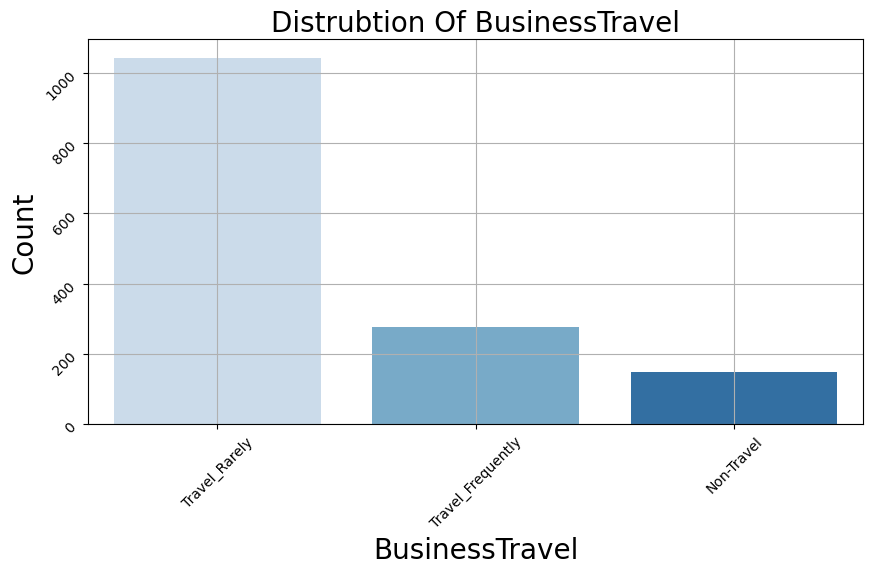

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='BusinessTravel',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of BusinessTravel',fontsize=20)
plt.xlabel('BusinessTravel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [15]:
pd.crosstab(data.Attrition,data.BusinessTravel)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156

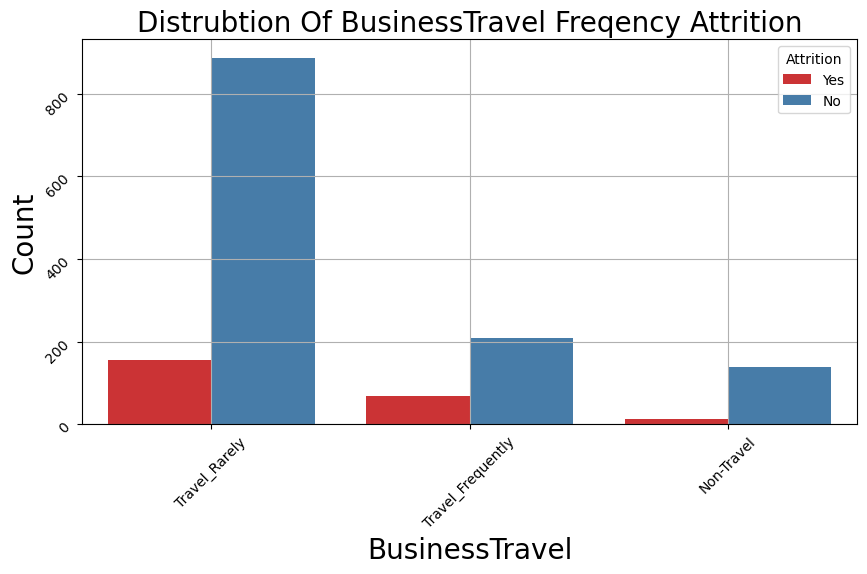

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of BusinessTravel Freqency Attrition',fontsize=20)
plt.xlabel('BusinessTravel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [17]:
data.DailyRate.value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

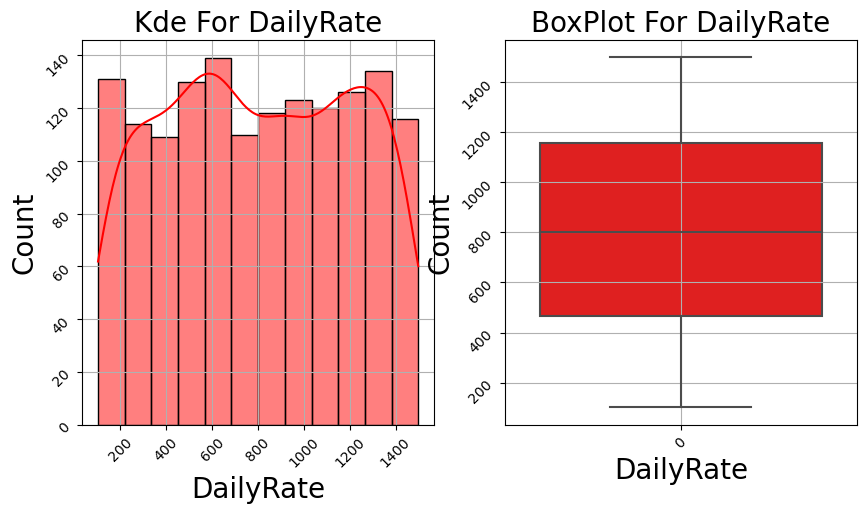

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data.DailyRate,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For DailyRate',fontsize=20)
plt.xlabel('DailyRate',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data.DailyRate,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For DailyRate',fontsize=20)
plt.xlabel('DailyRate',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [19]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

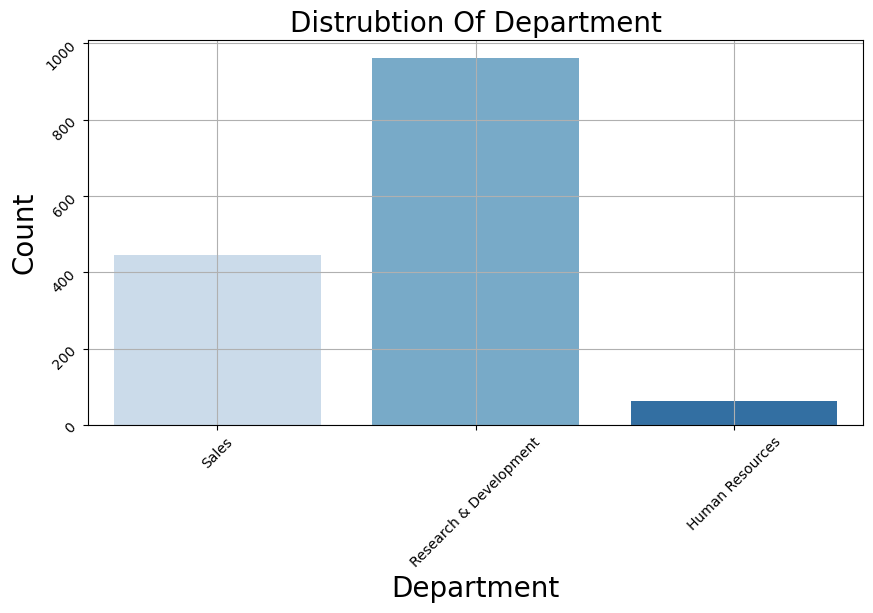

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of Department',fontsize=20)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [21]:
pd.crosstab(data.Attrition,data.Department)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92

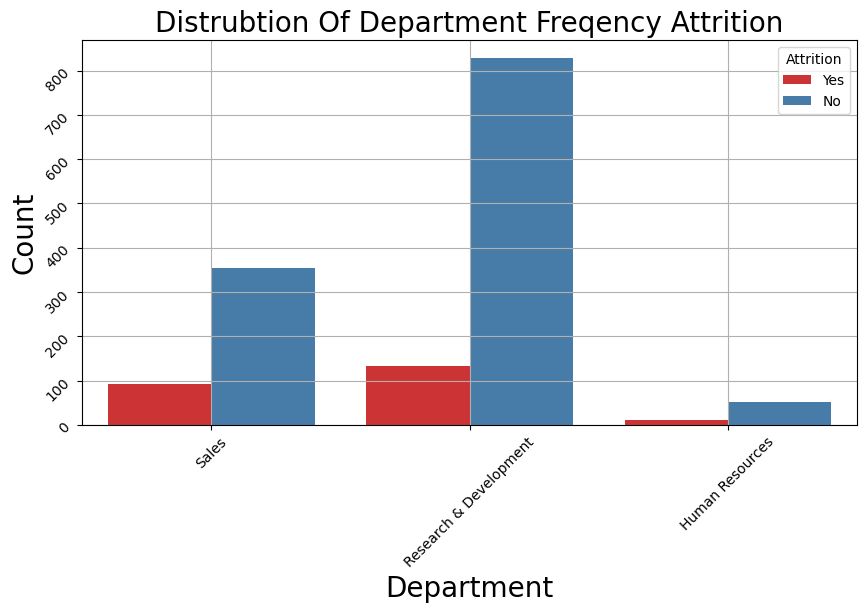

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Department Freqency Attrition',fontsize=20)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [23]:
data.groupby(['BusinessTravel','Department','Attrition'])['Attrition'].count()

BusinessTravel     Department              Attrition
Non-Travel         Human Resources         No             6
                   Research & Development  No            89
                                           Yes            8
                   Sales                   No            43
                                           Yes            4
Travel_Frequently  Human Resources         No             7
                                           Yes            4
                   Research & Development  No           145
                                           Yes           37
                   Sales                   No            56
                                           Yes           28
Travel_Rarely      Human Resources         No            38
                                           Yes            8
                   Research & Development  No           594
                                           Yes           88
                   Sales                   No  

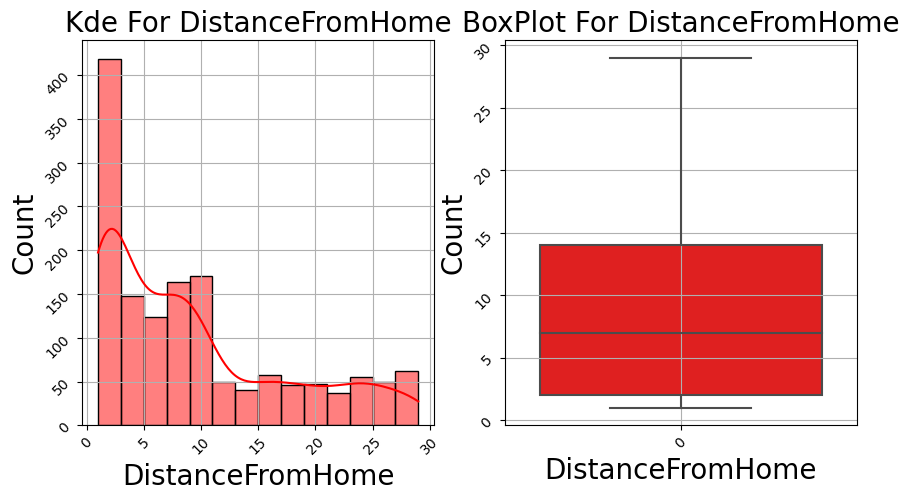

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data.DistanceFromHome,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For DistanceFromHome',fontsize=20)
plt.xlabel('DistanceFromHome',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data.DistanceFromHome,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For DistanceFromHome',fontsize=20)
plt.xlabel('DistanceFromHome',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [25]:
data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

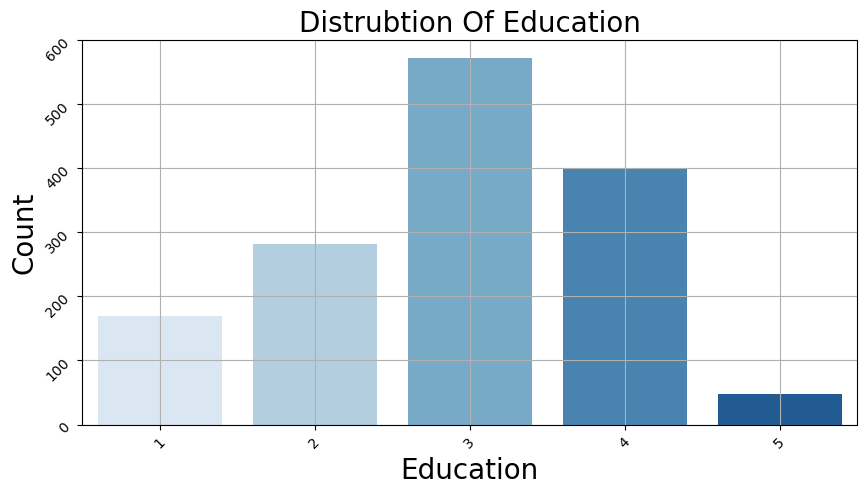

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of Education',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [27]:
pd.crosstab(data.Attrition,data.Education)

Education    1    2    3    4   5
Attrition                        
No         139  238  473  340  43
Yes         31   44   99   58   5

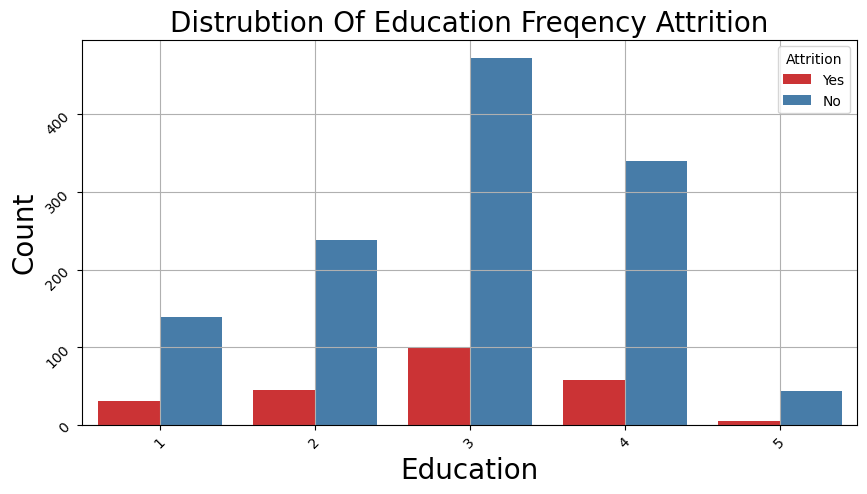

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Education Freqency Attrition',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [29]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

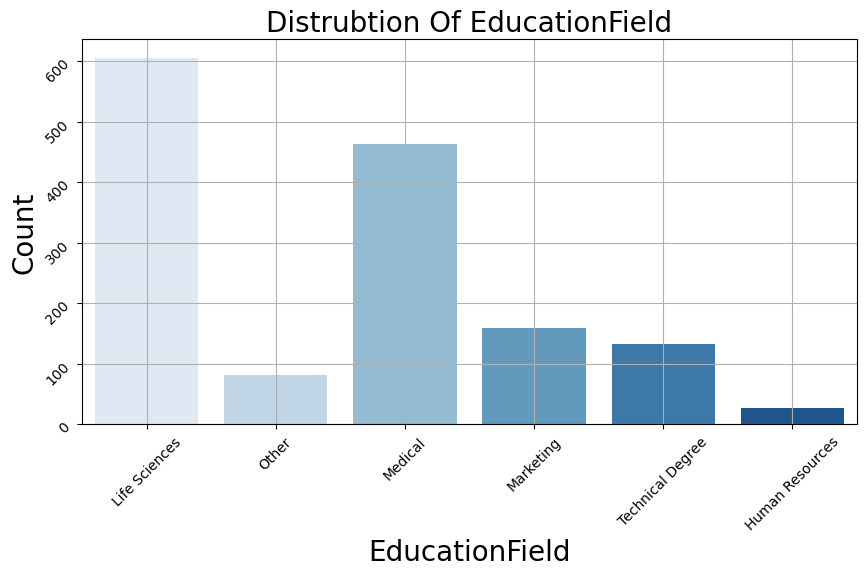

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of EducationField',fontsize=20)
plt.xlabel('EducationField',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [31]:
pd.crosstab(data.Attrition,data.EducationField)

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                           20            517        124      401     71   
Yes                           7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
No                           100  
Yes                           32

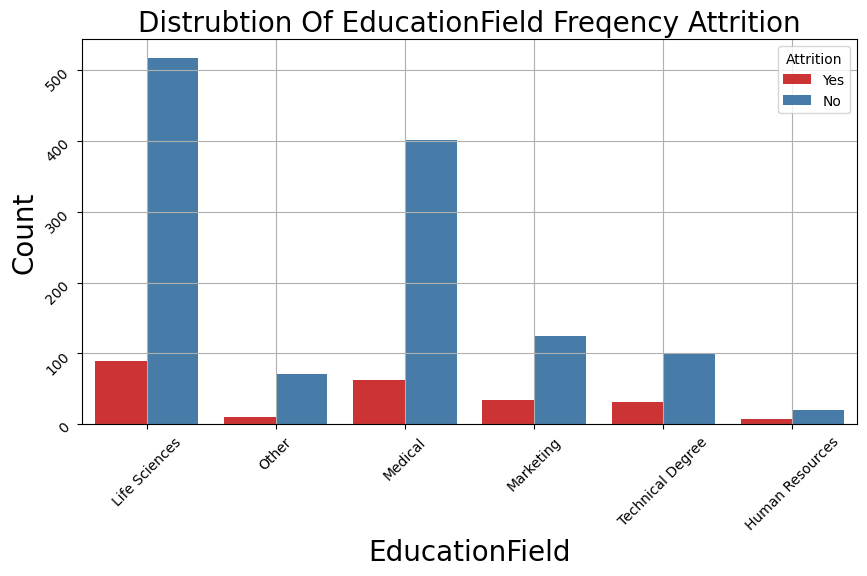

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of EducationField Freqency Attrition',fontsize=20)
plt.xlabel('EducationField',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [33]:
pd.crosstab(data.EducationField,data.Education)

Education          1    2    3    4   5
EducationField                         
Human Resources    2    2   16    5   2
Life Sciences     67  116  233  173  17
Marketing         14   24   59   52  10
Medical           63   99  183  104  15
Other              5   19   24   33   1
Technical Degree  19   22   57   31   3

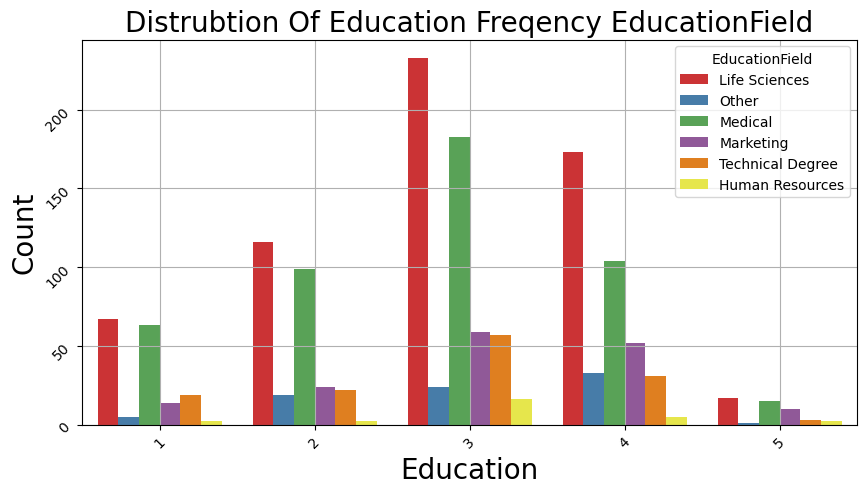

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education',hue='EducationField',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Education Freqency EducationField',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [35]:
pd.crosstab(data.Department,data.EducationField)

EducationField          Human Resources  Life Sciences  Marketing  Medical  \
Department                                                                   
Human Resources                      27             16          0       13   
Research & Development                0            440          0      363   
Sales                                 0            150        159       88   

EducationField          Other  Technical Degree  
Department                                       
Human Resources             3                 4  
Research & Development     64                94  
Sales                      15                34

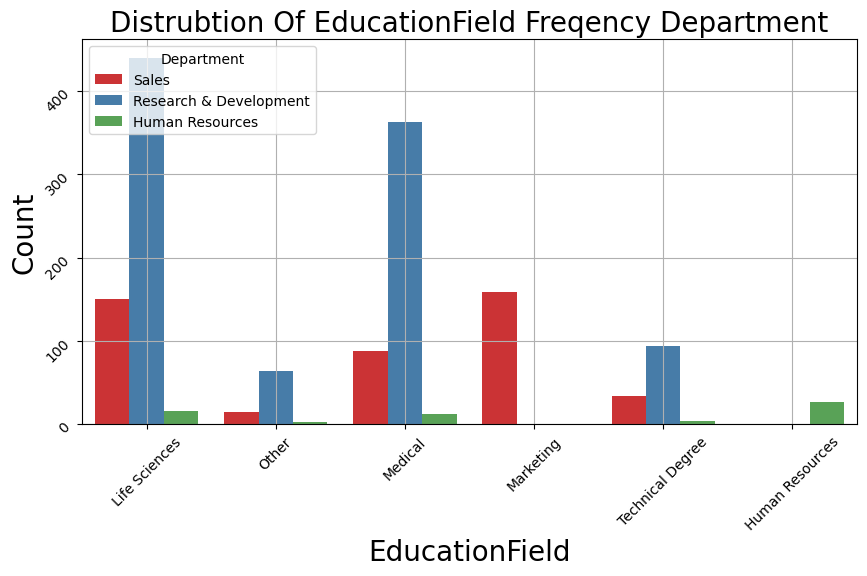

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',hue='Department',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of EducationField Freqency Department',fontsize=20)
plt.xlabel('EducationField',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [37]:
pd.crosstab(data.BusinessTravel,data.EducationField)

EducationField     Human Resources  Life Sciences  Marketing  Medical  Other  \
BusinessTravel                                                                 
Non-Travel                       4             63         12       50      7   
Travel_Frequently                6            123         27       86     14   
Travel_Rarely                   17            420        120      328     61   

EducationField     Technical Degree  
BusinessTravel                       
Non-Travel                       14  
Travel_Frequently                21  
Travel_Rarely                    97

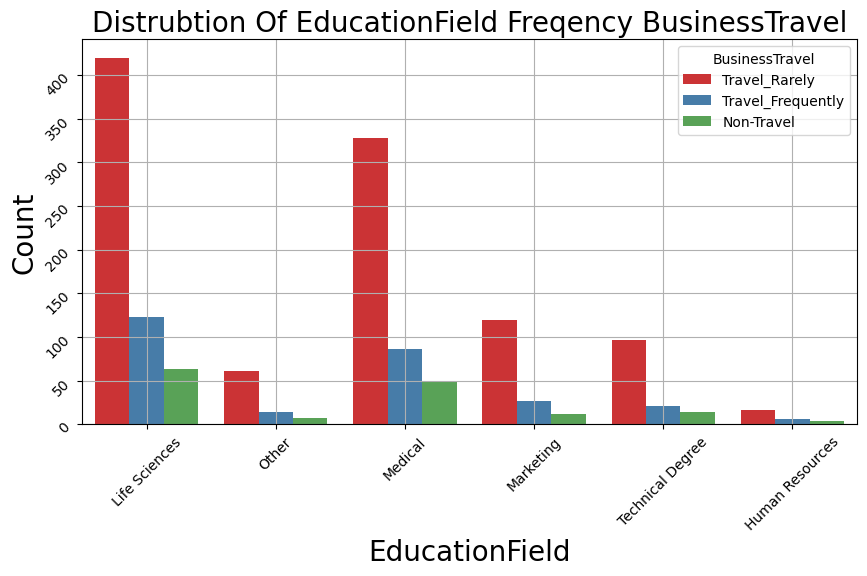

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',hue='BusinessTravel',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of EducationField Freqency BusinessTravel',fontsize=20)
plt.xlabel('EducationField',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [39]:
data.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

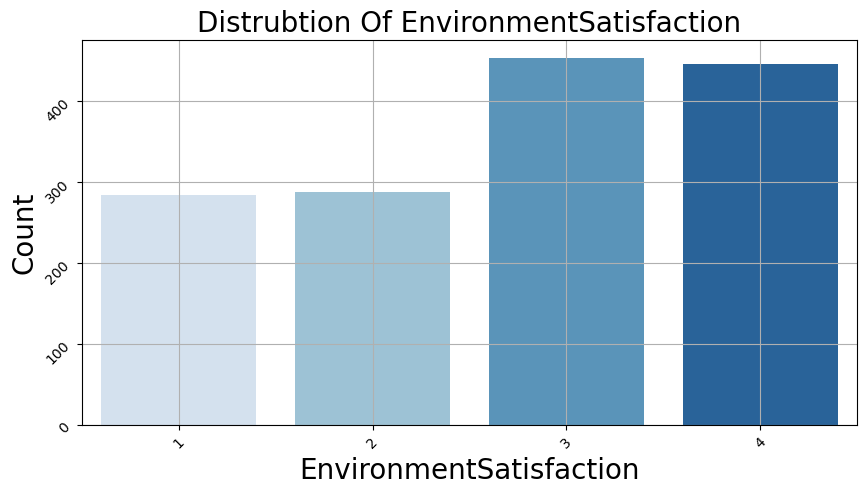

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='EnvironmentSatisfaction',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of EnvironmentSatisfaction',fontsize=20)
plt.xlabel('EnvironmentSatisfaction',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [41]:
pd.crosstab(data.Attrition,data.EnvironmentSatisfaction)

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
No                       212  244  391  386
Yes                       72   43   62   60

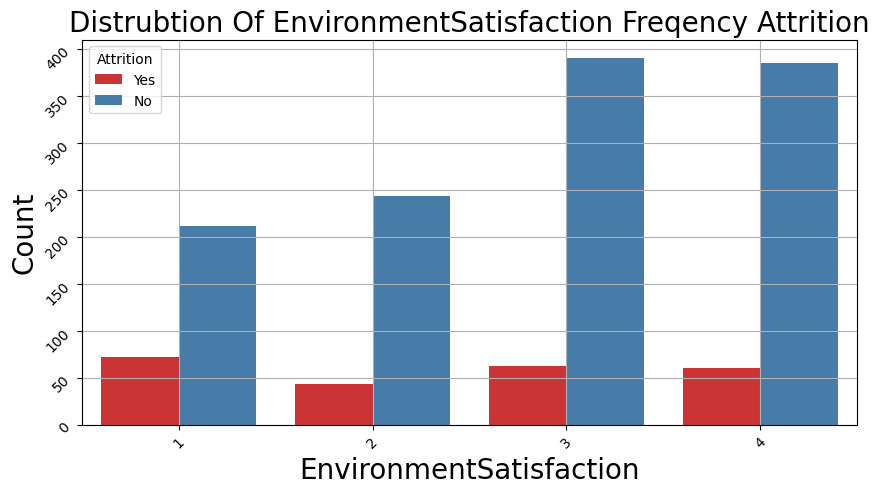

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of EnvironmentSatisfaction Freqency Attrition',fontsize=20)
plt.xlabel('EnvironmentSatisfaction',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [43]:
data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

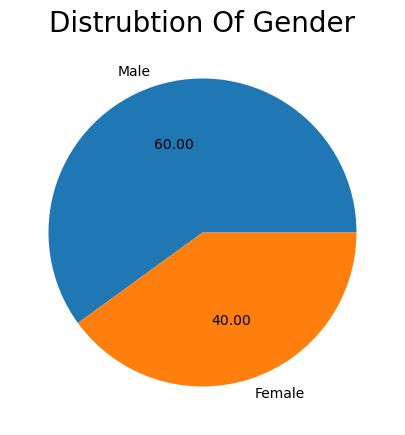

In [44]:
plt.figure(figsize=(10,5))
plt.pie(data.Gender.value_counts().values,labels=data.Gender.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Gender',fontsize=20)
plt.show()

In [45]:
pd.crosstab(data.Attrition,data.Gender)

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150

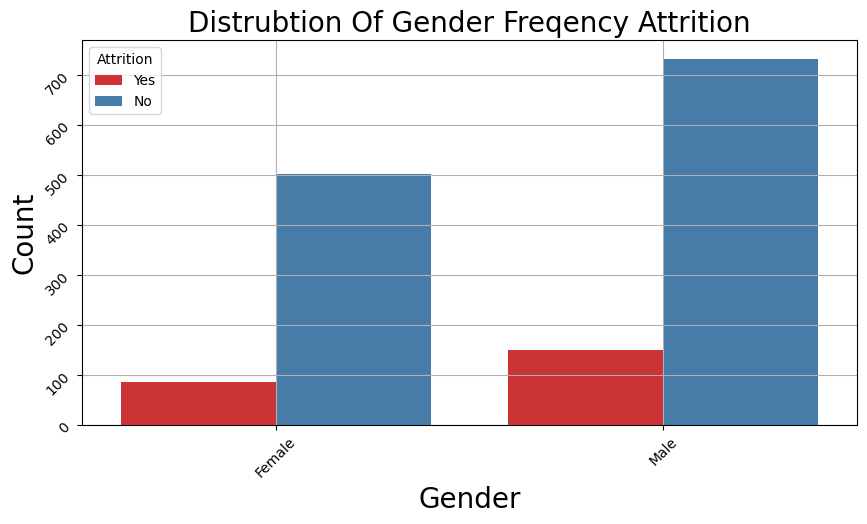

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Gender Freqency Attrition',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

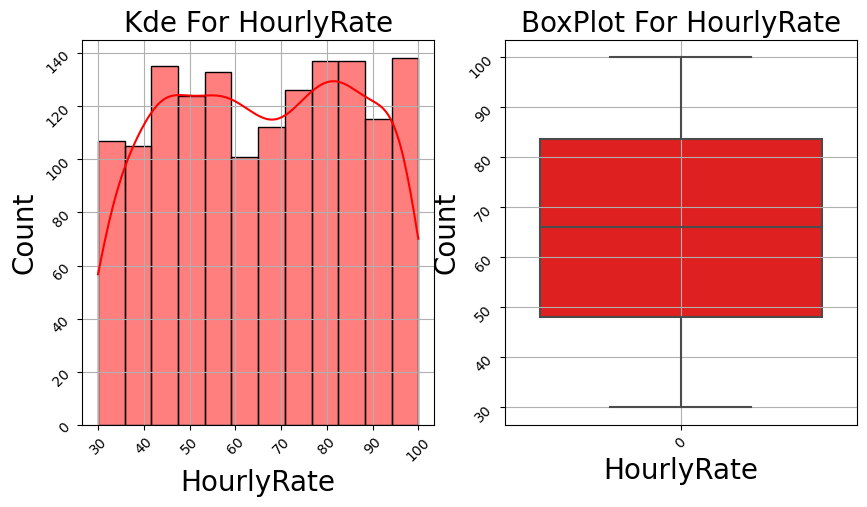

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data.HourlyRate,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For HourlyRate',fontsize=20)
plt.xlabel('HourlyRate',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data.HourlyRate,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For HourlyRate',fontsize=20)
plt.xlabel('HourlyRate',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [48]:
data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

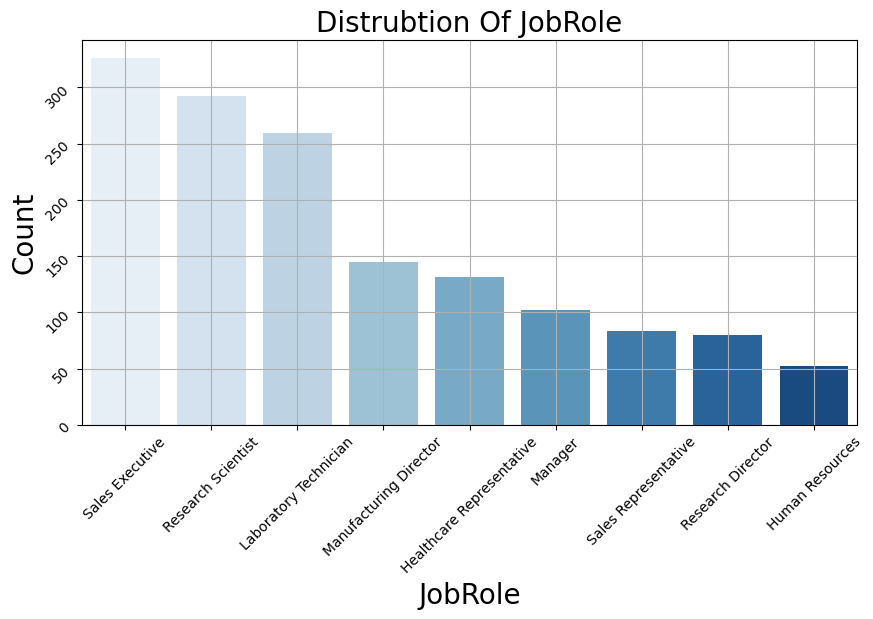

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of JobRole',fontsize=20)
plt.xlabel('JobRole',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [50]:
pd.crosstab(data.Attrition,data.JobRole)

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                               122               40                    197   
Yes                                9               12                     62   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No              97                     135                 78   
Yes              5                      10                  2   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                        245              269                    50  
Yes                        47               57                    33

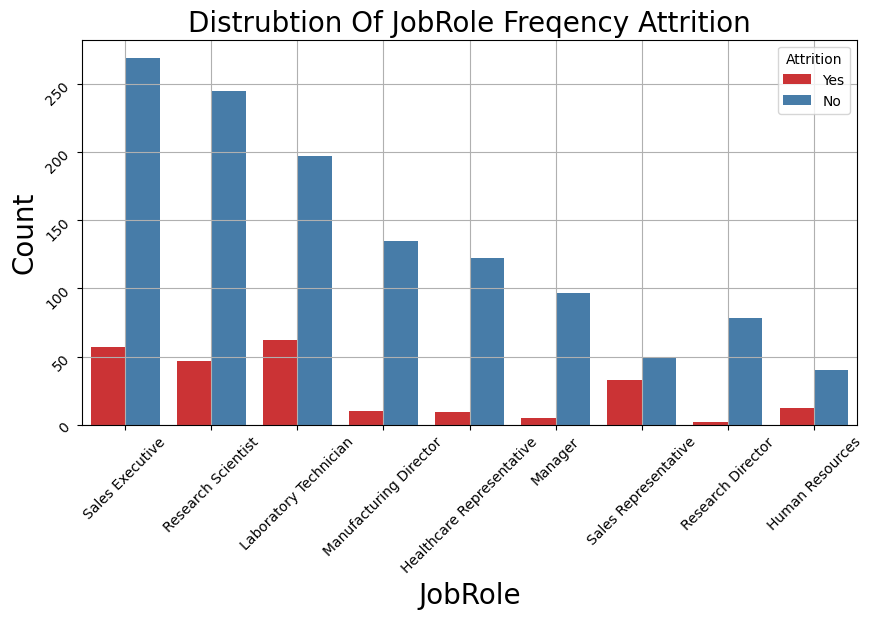

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of JobRole Freqency Attrition',fontsize=20)
plt.xlabel('JobRole',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [52]:
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

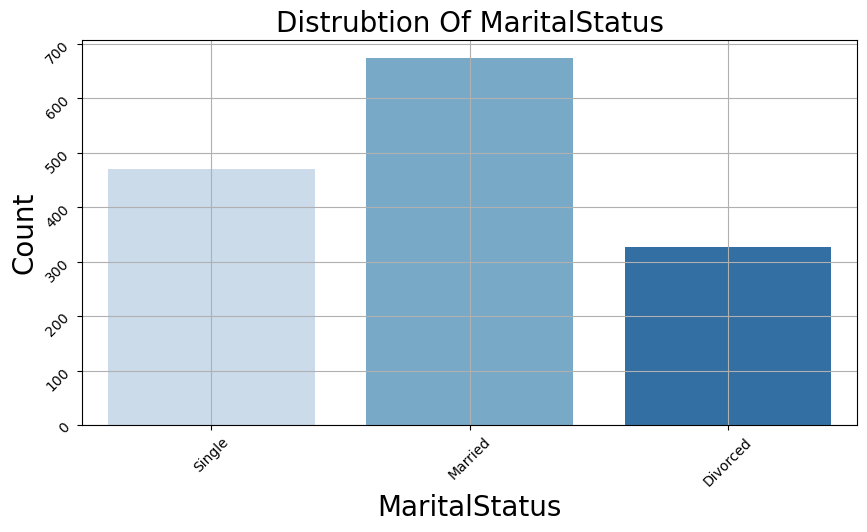

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='MaritalStatus',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of MaritalStatus',fontsize=20)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [54]:
pd.crosstab(data.Attrition,data.MaritalStatus)

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120

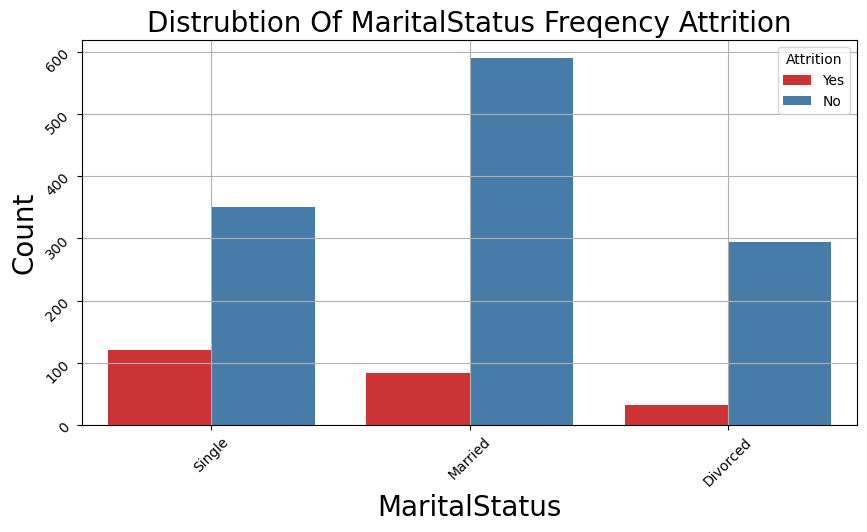

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of MaritalStatus Freqency Attrition',fontsize=20)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [56]:
data.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [57]:
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

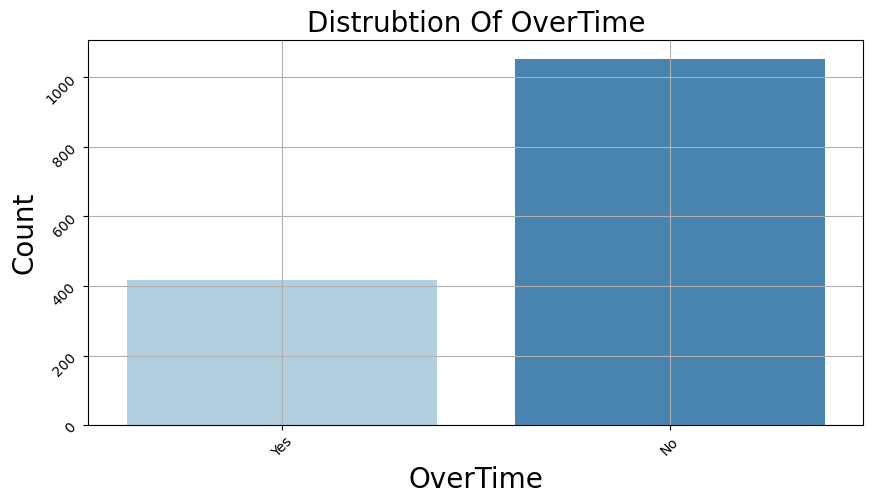

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='OverTime',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of OverTime',fontsize=20)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [59]:
pd.crosstab(data.Attrition,data.OverTime)

OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127

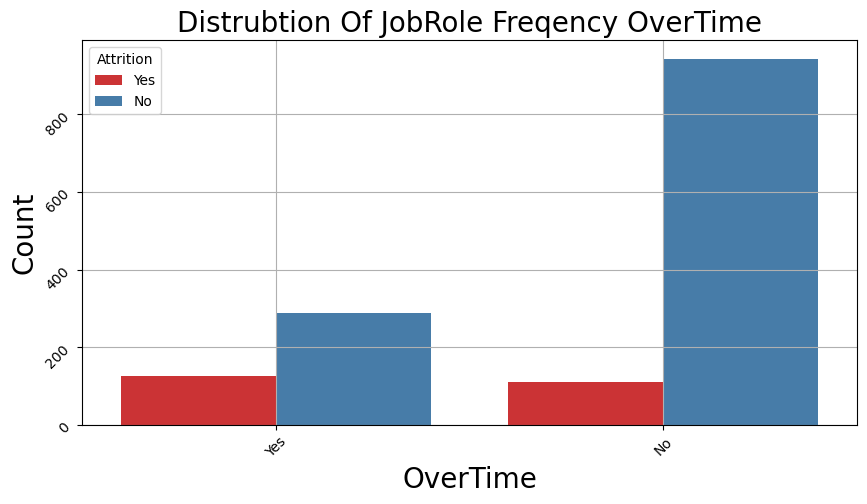

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x='OverTime',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of JobRole Freqency OverTime',fontsize=20)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [61]:
data.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

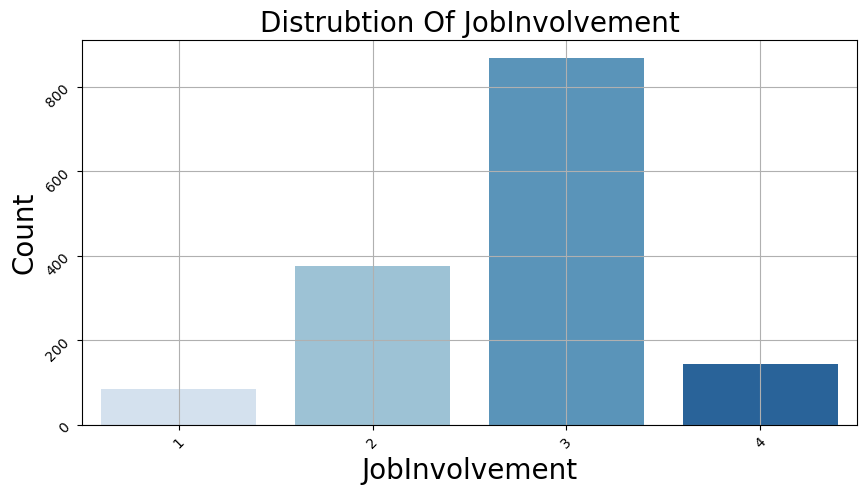

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobInvolvement',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of JobInvolvement',fontsize=20)
plt.xlabel('JobInvolvement',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [63]:
pd.crosstab(data.Attrition,data.JobInvolvement)

JobInvolvement   1    2    3    4
Attrition                        
No              55  304  743  131
Yes             28   71  125   13

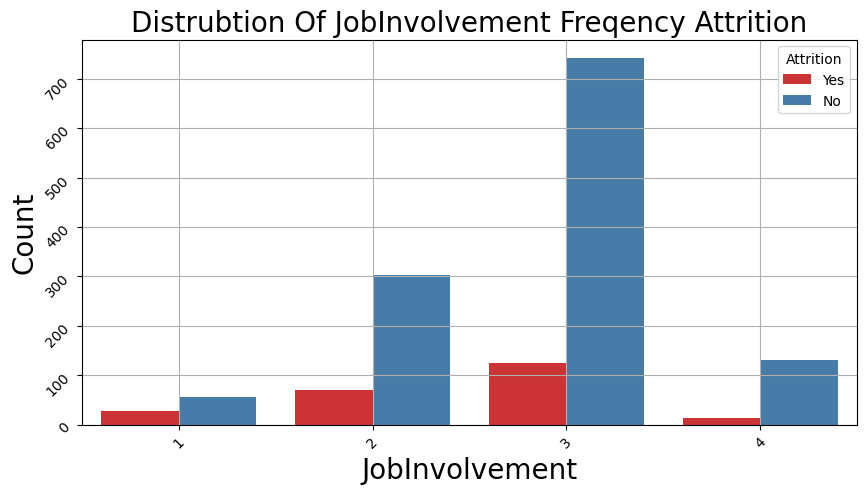

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobInvolvement',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of JobInvolvement Freqency Attrition',fontsize=20)
plt.xlabel('JobInvolvement',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [65]:
data.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

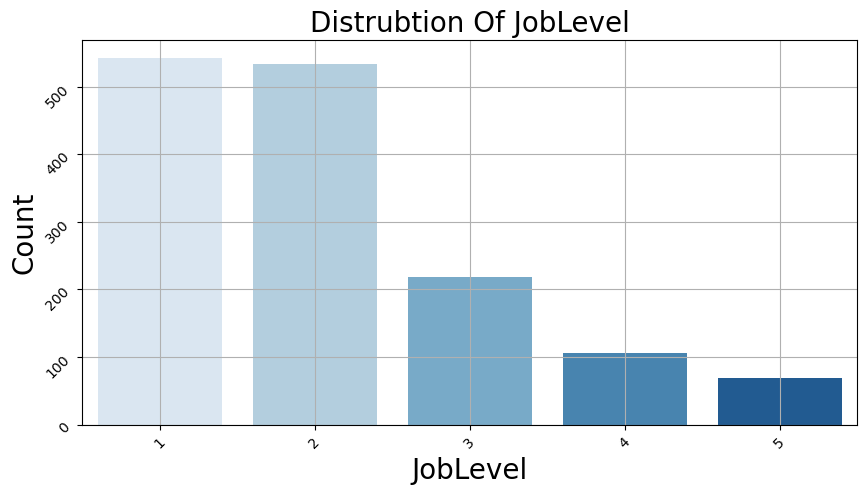

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobLevel',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of JobLevel',fontsize=20)
plt.xlabel('JobLevel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [67]:
pd.crosstab(data.Attrition,data.JobLevel)

JobLevel     1    2    3    4   5
Attrition                        
No         400  482  186  101  64
Yes        143   52   32    5   5

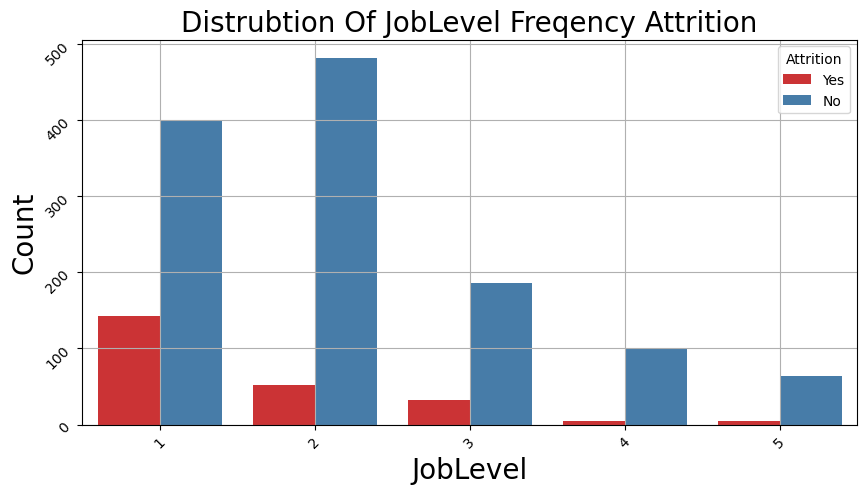

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobLevel',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of JobLevel Freqency Attrition',fontsize=20)
plt.xlabel('JobLevel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [69]:
data.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

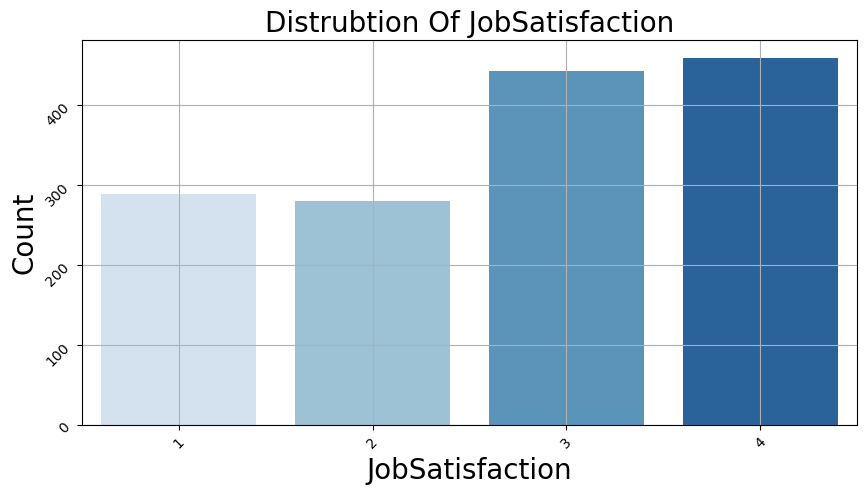

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobSatisfaction',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of JobSatisfaction',fontsize=20)
plt.xlabel('JobSatisfaction',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [71]:
pd.crosstab(data.Attrition,data.JobSatisfaction)

JobSatisfaction    1    2    3    4
Attrition                          
No               223  234  369  407
Yes               66   46   73   52

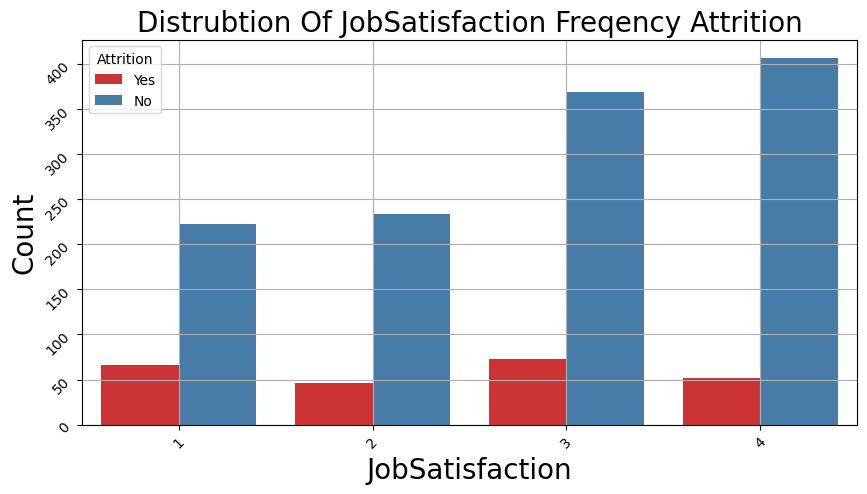

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of JobSatisfaction Freqency Attrition',fontsize=20)
plt.xlabel('JobSatisfaction',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [73]:
data.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

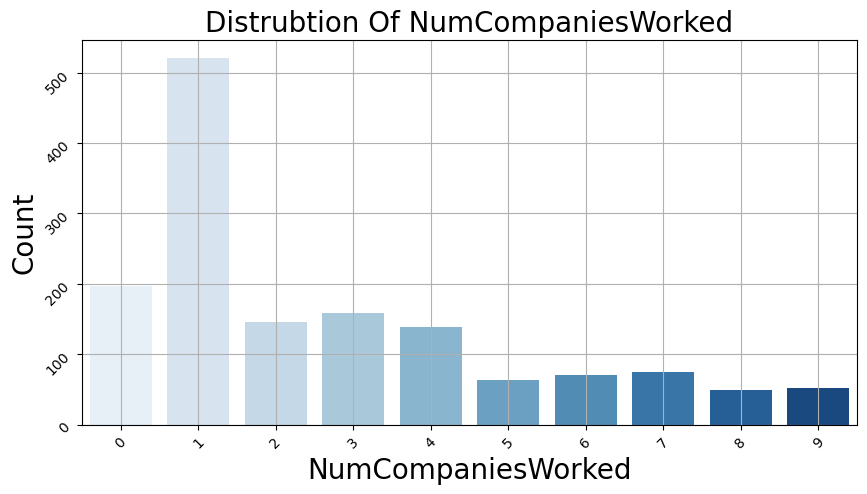

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumCompaniesWorked',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of NumCompaniesWorked',fontsize=20)
plt.xlabel('NumCompaniesWorked',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [75]:
pd.crosstab(data.Attrition,data.NumCompaniesWorked)

NumCompaniesWorked    0    1    2    3    4   5   6   7   8   9
Attrition                                                      
No                  174  423  130  143  122  47  54  57  43  40
Yes                  23   98   16   16   17  16  16  17   6  12

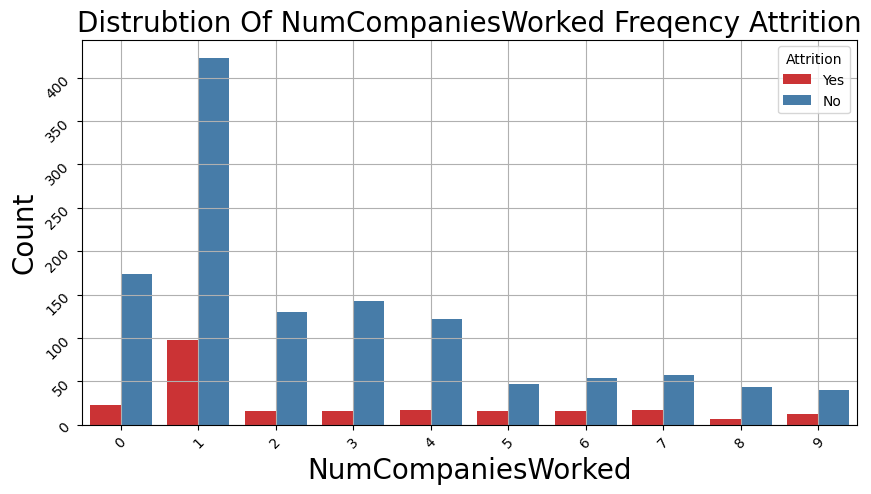

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of NumCompaniesWorked Freqency Attrition',fontsize=20)
plt.xlabel('NumCompaniesWorked',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [77]:
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

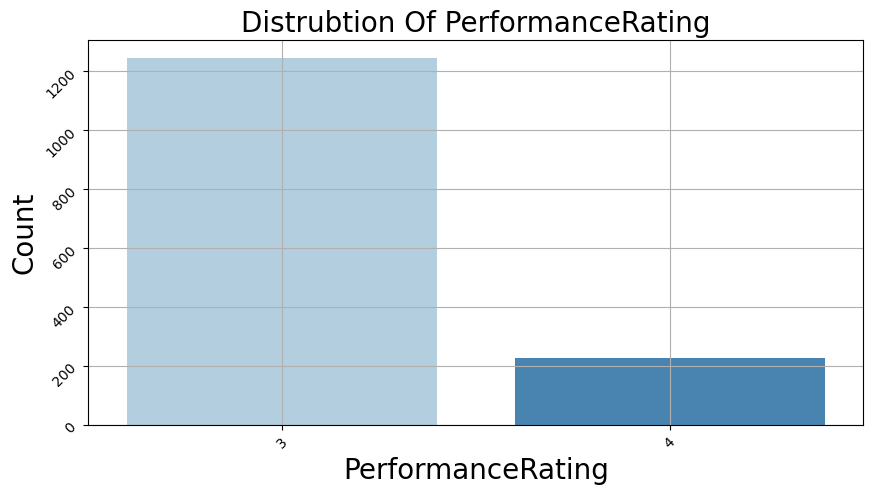

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceRating',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of PerformanceRating',fontsize=20)
plt.xlabel('PerformanceRating',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [79]:
pd.crosstab(data.Attrition,data.PerformanceRating)

PerformanceRating     3    4
Attrition                   
No                 1044  189
Yes                 200   37

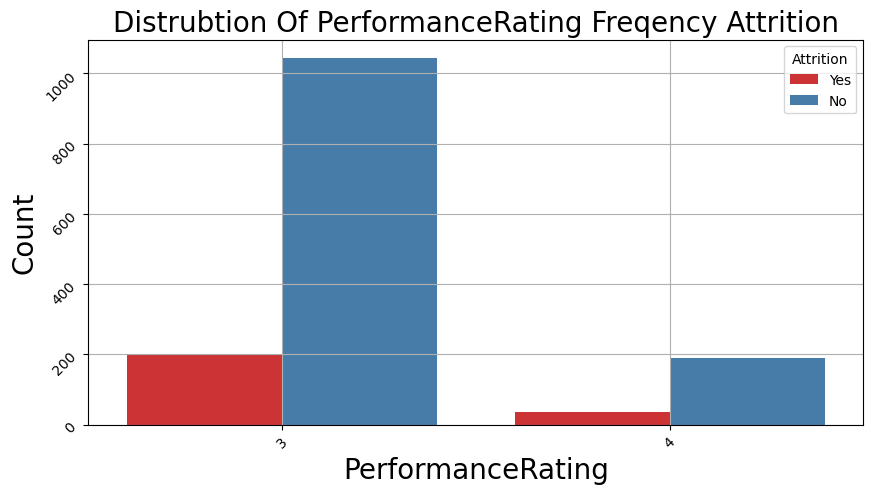

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceRating',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of PerformanceRating Freqency Attrition',fontsize=20)
plt.xlabel('PerformanceRating',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [81]:
data.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

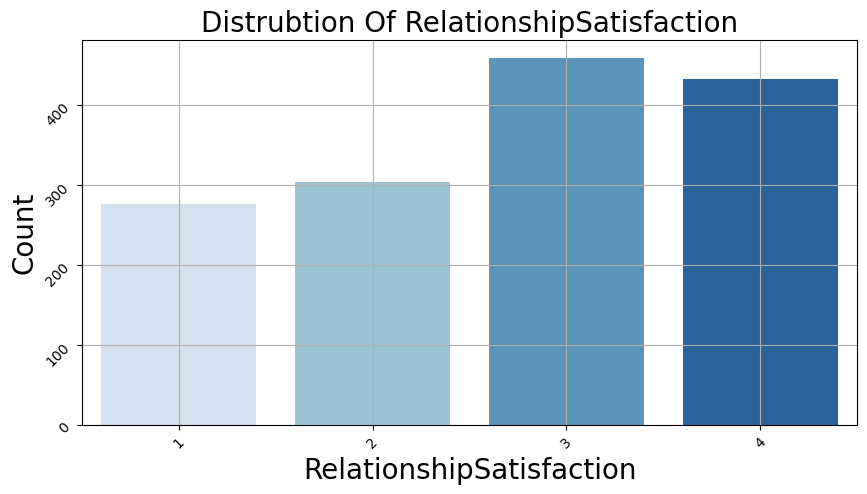

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x='RelationshipSatisfaction',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of RelationshipSatisfaction',fontsize=20)
plt.xlabel('RelationshipSatisfaction',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [83]:
pd.crosstab(data.Attrition,data.RelationshipSatisfaction)

RelationshipSatisfaction    1    2    3    4
Attrition                                   
No                        219  258  388  368
Yes                        57   45   71   64

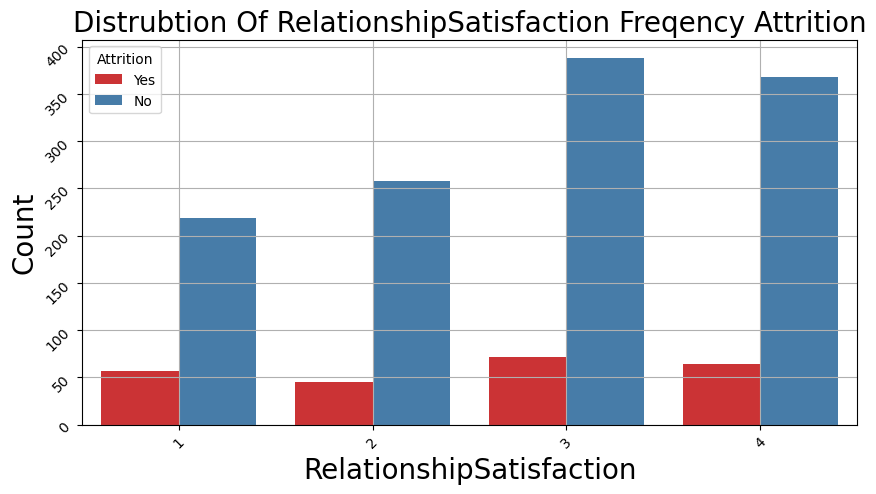

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of RelationshipSatisfaction Freqency Attrition',fontsize=20)
plt.xlabel('RelationshipSatisfaction',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [85]:
data.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [86]:
data.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

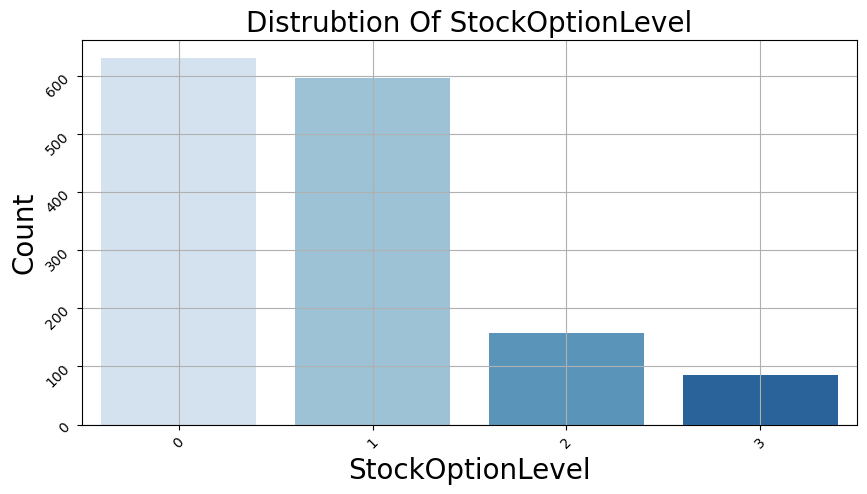

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x='StockOptionLevel',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of StockOptionLevel',fontsize=20)
plt.xlabel('StockOptionLevel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [88]:
pd.crosstab(data.Attrition,data.StockOptionLevel)

StockOptionLevel    0    1    2   3
Attrition                          
No                477  540  146  70
Yes               154   56   12  15

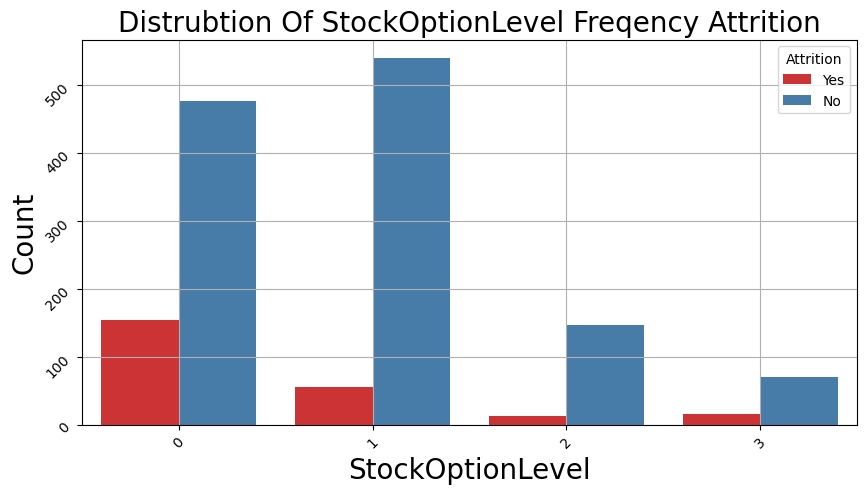

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x='StockOptionLevel',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of StockOptionLevel Freqency Attrition',fontsize=20)
plt.xlabel('StockOptionLevel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [90]:
data.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

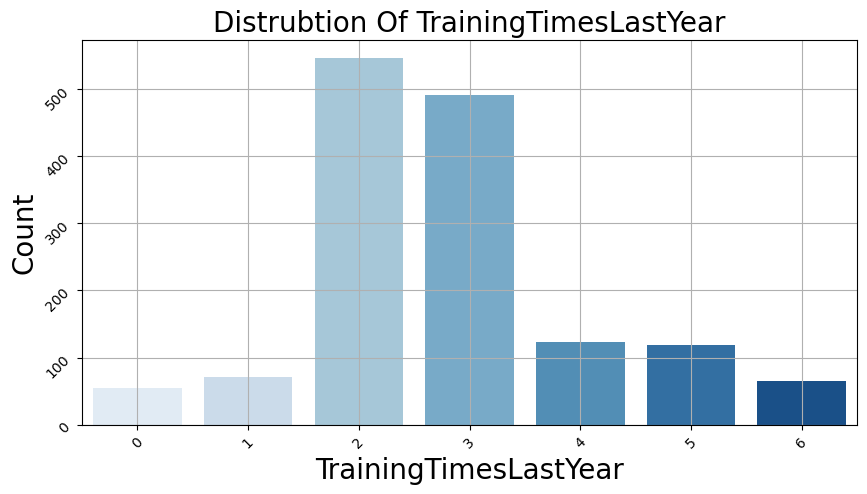

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(x='TrainingTimesLastYear',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of TrainingTimesLastYear',fontsize=20)
plt.xlabel('TrainingTimesLastYear',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [92]:
pd.crosstab(data.Attrition,data.TrainingTimesLastYear)

TrainingTimesLastYear   0   1    2    3   4    5   6
Attrition                                           
No                     39  62  449  422  97  105  59
Yes                    15   9   98   69  26   14   6

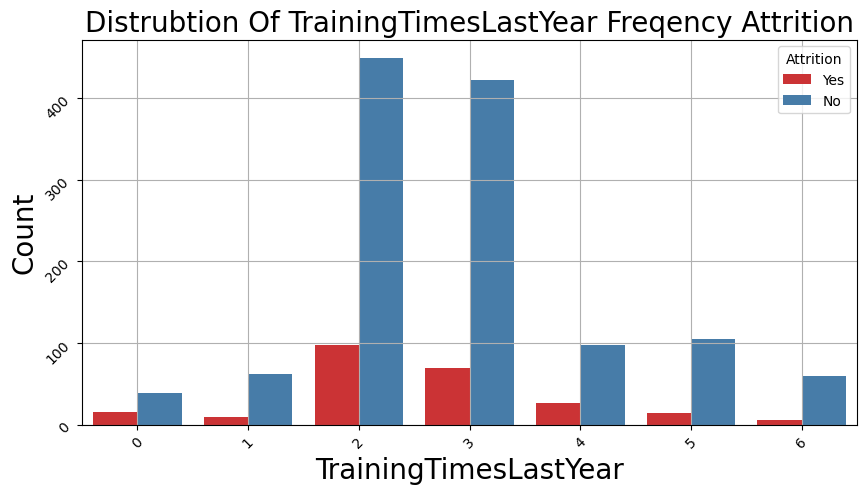

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of TrainingTimesLastYear Freqency Attrition',fontsize=20)
plt.xlabel('TrainingTimesLastYear',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [94]:
data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

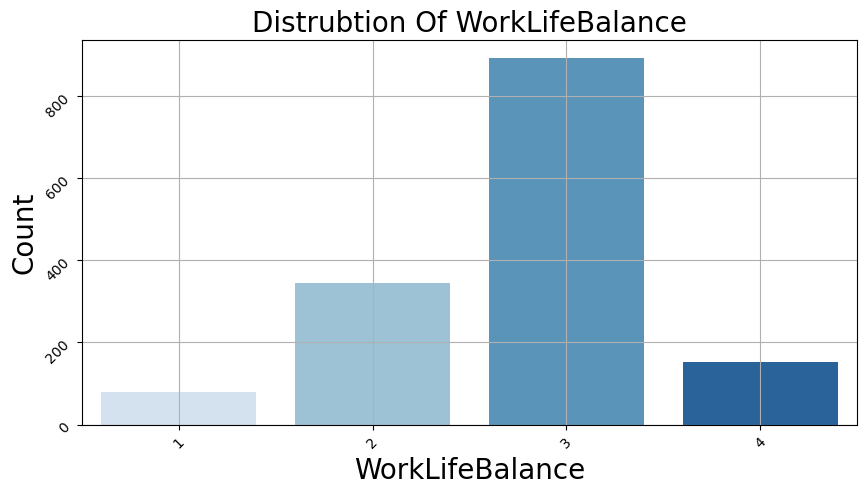

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='WorkLifeBalance',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of WorkLifeBalance',fontsize=20)
plt.xlabel('WorkLifeBalance',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [96]:
pd.crosstab(data.Attrition,data.WorkLifeBalance)

WorkLifeBalance   1    2    3    4
Attrition                         
No               55  286  766  126
Yes              25   58  127   27

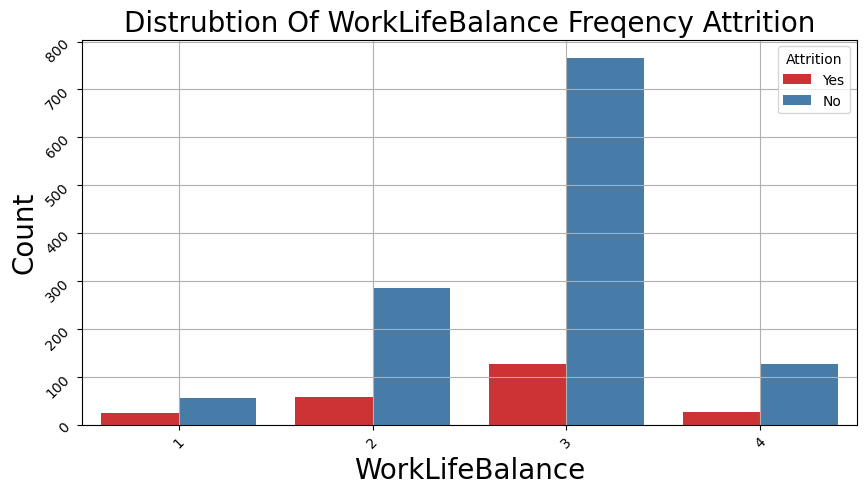

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of WorkLifeBalance Freqency Attrition',fontsize=20)
plt.xlabel('WorkLifeBalance',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

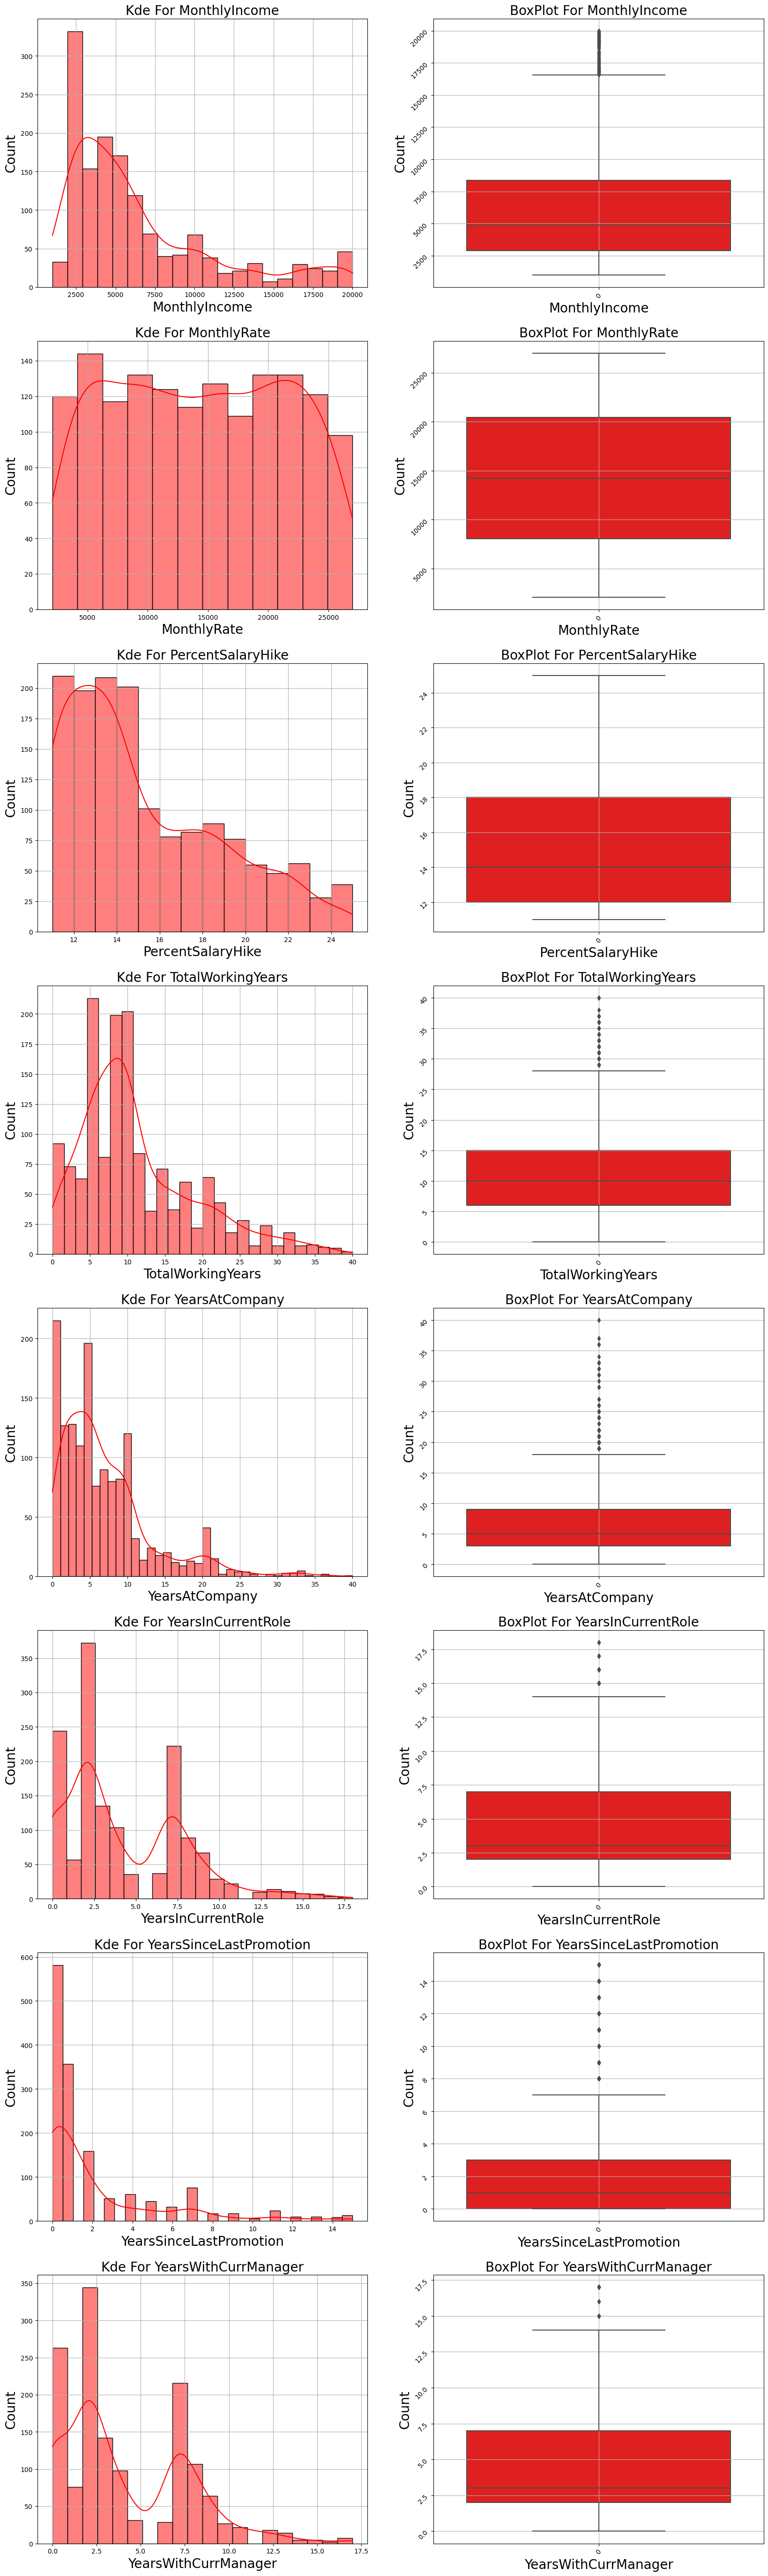

In [98]:
li=['MonthlyIncome','MonthlyRate', 'PercentSalaryHike',
    'TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole',
   'YearsSinceLastPromotion', 'YearsWithCurrManager']
plt.figure(figsize=(20,70))
i=1
for x in li:
    plt.subplot(len(li),2,i)
    sns.histplot(data[x],kde=True,color='r')
    plt.grid(True)
    plt.title(f'Kde For {x}',fontsize=20)
    plt.xlabel(f'{x}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    i+=1
    plt.subplot(len(li),2,i)
    sns.boxplot(data=data[x],color='r')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(f'BoxPlot For {x}',fontsize=20)
    plt.xlabel(f'{x}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    i+=1

In [99]:
for x in li:
    q75,q25 = np.percentile(data[x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    data[x][data[x]>max]=max
    data[x][data[x]<min]=min

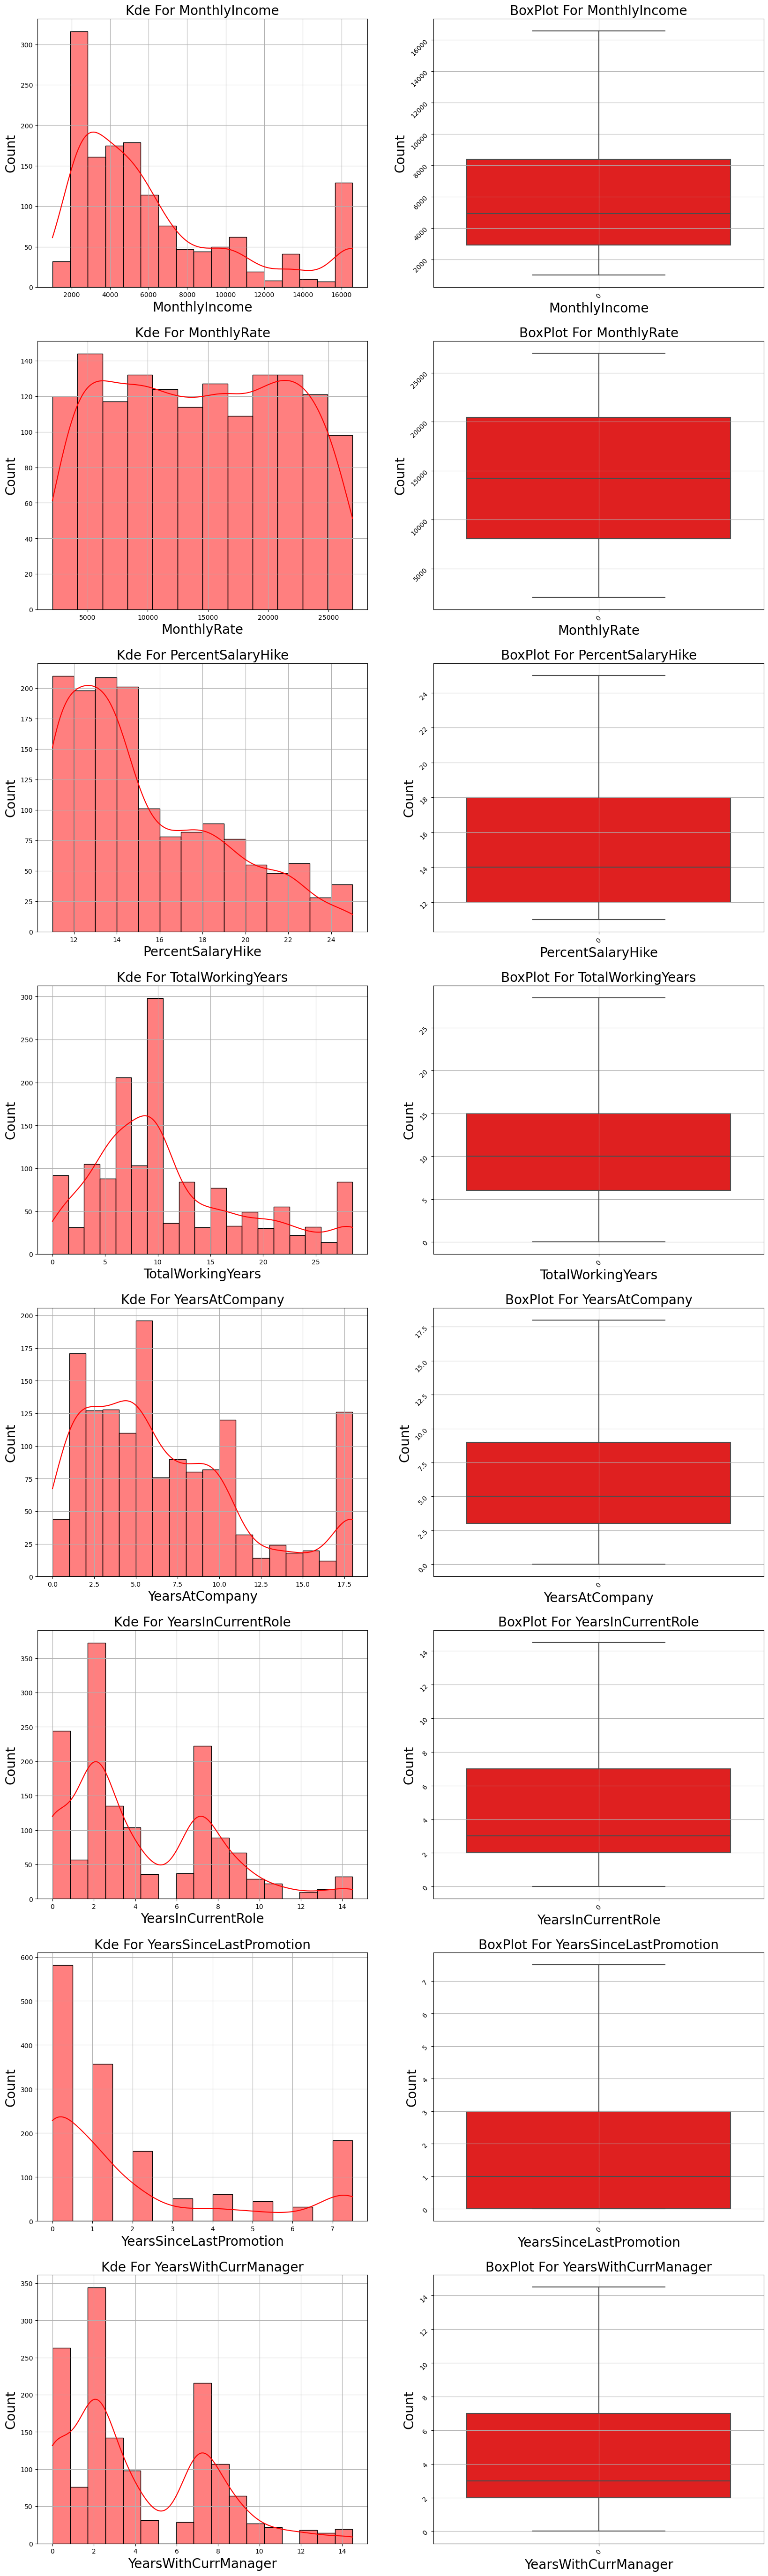

In [100]:
plt.figure(figsize=(20,70))
i=1
for x in li:
    plt.subplot(len(li),2,i)
    sns.histplot(data[x],kde=True,color='r')
    plt.grid(True)
    plt.title(f'Kde For {x}',fontsize=20)
    plt.xlabel(f'{x}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    i+=1
    plt.subplot(len(li),2,i)
    sns.boxplot(data=data[x],color='r')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(f'BoxPlot For {x}',fontsize=20)
    plt.xlabel(f'{x}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    i+=1

In [101]:
data2=data.copy()
label=LabelEncoder()
for x in data2.select_dtypes(include='object').columns:
    data2[x]=label.fit_transform(data2[x])
data2.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                      0                1               6   
1               10.0                      3                3              10   
2                7.0                      3                3               0   
3                8.0                      3                3               8   
4                6.0                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0  

[5 rows x 35 columns]

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.499693  -0.164778        0.031554   0.008438   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
Over18                         NaN        NaN             NaN        NaN   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.678402  -0.180628        0.033749   0.023059   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.278548  -0.162211       -0.017548  -0.021956   
YearsInCurrentRole        0.210424  -0.161484       -0.012972   0.010869   
YearsSinceLastPromotion   0.190525  -0.037486       -0.025820  -0.035150   
YearsWithCurrManager      0.201551  -0.156498       -0.025587  -0.024639   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.0144

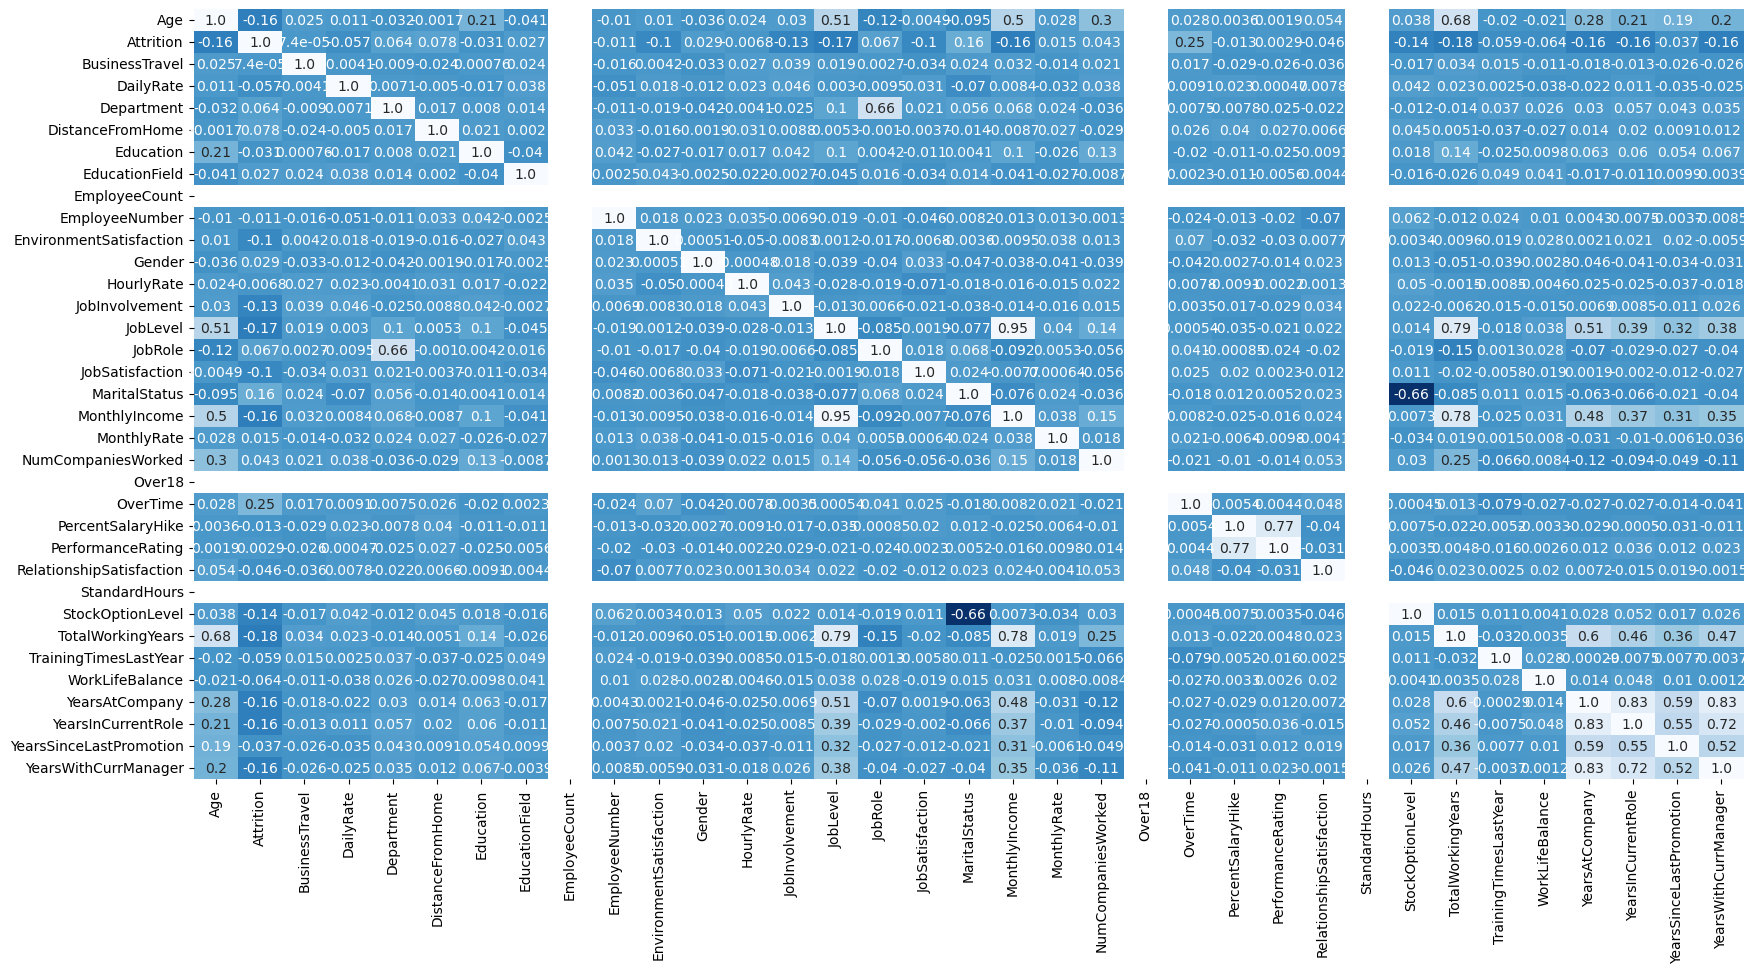

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
data2.corr()

In [103]:
X=data2.drop('Attrition',axis=1)
y=data2['Attrition']
key=X.keys()
X.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0               1              1               1                        2   
1               1              1               2                        3   
2               4              1               4                        4   
3               1              1               5                        4   
4               3              1               7                        1   

   ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  ...                         1             80                 0   
1  ...                         4             80                 1   
2  ...                         2             80                 0   
3  ...                         3             80                 0   
4  ...                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                      0                1               6   
1               10.0                      3                3              10   
2                7.0                      3                3               0   
3                8.0                      3                3               8   
4                6.0                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0  

[5 rows x 34 columns]

In [104]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [105]:
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1972, 34)
X_test shape is  (494, 34)
y_train shape is  (1972,)
y_test shape is  (494,)


In [128]:
random_pip=Pipeline([
                    ('min_max',MinMaxScaler()),
                    ('model',RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=10,random_state=44))
                    ])
random_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=44))])

In [129]:
print('RandomForestClassifierModel Train Score is : ' ,random_pip.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' ,random_pip.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9939148073022313
RandomForestClassifierModel Test Score is :  0.8967611336032388


In [132]:
log_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',LogisticRegression(penalty='l2',solver='sag',C=2.0,random_state=44))
                    ])
log_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2.0, random_state=44, solver='sag'))])

In [133]:
print('LogisticRegressionModel Train Score is : ' , log_pip.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' ,log_pip.score(X_test, y_test))

LogisticRegressionModel Train Score is :  0.8433062880324543
LogisticRegressionModel Test Score is :  0.8340080971659919


In [111]:
sgd_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=44))
                    ])
sgd_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model', SGDClassifier(loss='squared_loss', random_state=44))])

In [112]:
print('SGDClassifierModel Train Score is : ' , sgd_pip.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' ,sgd_pip.score(X_test, y_test))

SGDClassifierModel Train Score is :  0.7626774847870182
SGDClassifierModel Test Score is :  0.7834008097165992


In [113]:
svc_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',SVC(kernel= 'rbf',max_iter=100,C=2.0,gamma='auto'))
                    ])
svc_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model', SVC(C=2.0, gamma='auto', max_iter=100))])

In [114]:
print('SVCModel Train Score is : ' ,svc_pip.score(X_train, y_train))
print('SVCModel Test Score is : ' , svc_pip.score(X_test, y_test))

SVCModel Train Score is :  0.6495943204868154
SVCModel Test Score is :  0.631578947368421


In [115]:
knn_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',KNeighborsClassifier(n_neighbors=9,weights ='uniform',algorithm='auto'))
                    ])
knn_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [116]:
print('KNNClassifierModel Train Score is : ' , knn_pip.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' ,knn_pip.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8362068965517241
KNNClassifierModel Test Score is :  0.8036437246963563


In [117]:
tree_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=44))
                    ])
tree_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=44))])

In [118]:
print('DecisionTreeClassifierModel Train Score is : ' , tree_pip.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , tree_pip.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.9781947261663286
DecisionTreeClassifierModel Test Score is :  0.8117408906882592


In [141]:
xg_pip=Pipeline([
                ('min_max',MinMaxScaler()),
                ('model',XGBClassifier(max_depth=5))
                    ])
xg_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
        

In [142]:
print('XGBClassifierModel Train Score is : ' , xg_pip.score(X_train, y_train))
print('XGBClassifierModel Test Score is : ' , xg_pip.score(X_test, y_test))

XGBClassifierModel Train Score is :  1.0
XGBClassifierModel Test Score is :  0.917004048582996


In [121]:
y_pred=xg_pip.predict(X_test)

array([[239,  17],
       [ 24, 214]], dtype=int64)

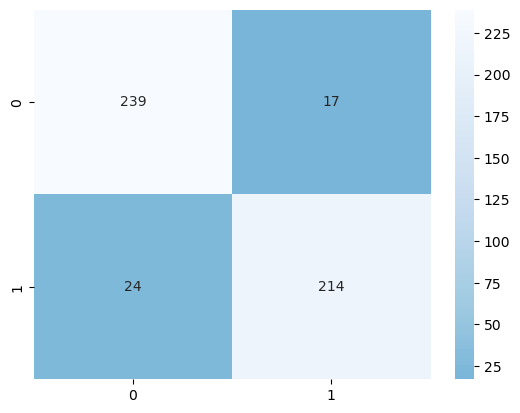

In [122]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
CM

In [123]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport) 

Classification Report is :                precision    recall  f1-score   support

           0       0.91      0.93      0.92       256
           1       0.93      0.90      0.91       238

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

